In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score,davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

# Sprawdzenie danych

In [3]:
df=pd.read_csv("clustering.csv",header=None)

In [4]:
df = np.array(df)

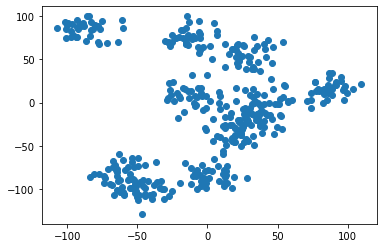

In [5]:
plt.scatter(df[:,0], df[:,1])

In [27]:
def plot_kmeans_clusters(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=30, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75)
    plt.title('K-means clusters')
    plt.show()

In [13]:
def count_wcss_scores(X, k_max):
    #  WCSS = within-cluster sum of squares
    scores = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(X)
        wcss = kmeans.score(X) * -1 # score returns -WCSS
        scores.append(wcss)
    return scores

In [16]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    # Napiszmy tę funkcje tak ogólnie, jak to możliwe. 
    # Zwróćcie uwagę na przekazanie obiektów typu callable: model i score_fun.
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

# Wybór liczby klastrów i K-średnich

Według tej metody najlepszą ilością klastrów było by 4. Ale na poniższym grafie widać, że nie jest to najlpeszy podział ponieważ nie dzieli niektórych grup które są ewidentnie oddizolowane. 

C:\Users\Patryk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


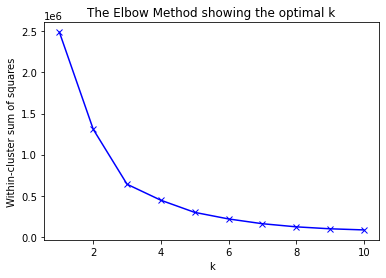

In [14]:
wcss_vec = count_wcss_scores(df, 10)
x_ticks = list(range(1, len(wcss_vec) + 1))
plt.plot(x_ticks, wcss_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Within-cluster sum of squares')
plt.title('The Elbow Method showing the optimal k')
plt.show()

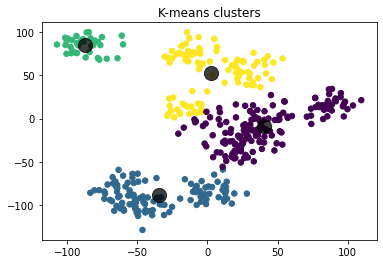

In [15]:
plot_kmeans_clusters(df, n_clusters=4)

Dlatego użyłem metody silhoutte która wyraźnie pokazuję, że najlepszą liczbą klastrów jest 8. Po rzuceniu ich na wykres widzimy, że znacznie ten podział jest znacznie lepszy.

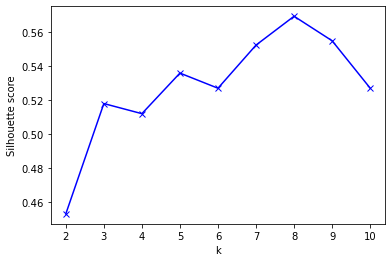

In [21]:
from sklearn.metrics import silhouette_score

cluster_num_seq = range(2, 11) # Niektóre metryki nie działają gdy mamy tylko jeden klaster
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

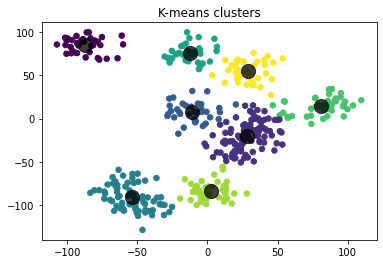

In [17]:
plot_kmeans_clusters(df, n_clusters=8)

# Podział metodą aglomeracyjną

Sprawdzam liczbę klastrów według metryki Davies-Bouldin. Tutaj patrzymy na minimum, które wypada w szóstce. Zatem dzielimy dla 6 klastrów. Jak widać uzyskaliśmy dość spójny i 'rozsządnie' wyglądający podział.

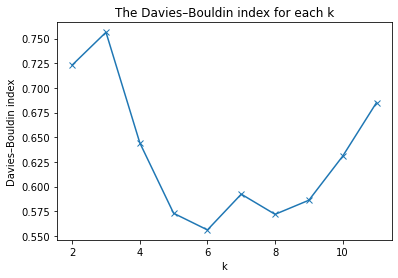

In [29]:
scores = []
for i in range(2, 12):
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(df)
    y_pred = model.fit_predict(df)
    scores.append(davies_bouldin_score(df,y_pred))
plt.figure()
x = list(range(2, 12))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin index')
plt.title('The Davies–Bouldin index for each k')
plt.show()

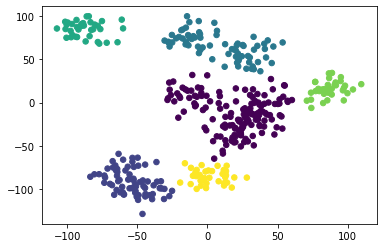

In [30]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6)
y = model.fit_predict(df)
plt.scatter(df[:, 0], df[:, 1], c=y, s=30, cmap='viridis')
plt.show()